# Histogram/Density Plot - Distribution Analysis

**Use Case**: Show distribution (age distribution, test scores, income levels)

This notebook demonstrates how to create effective histogram and density plots for analyzing data distributions.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Set random seed for reproducibility
np.random.seed(42)

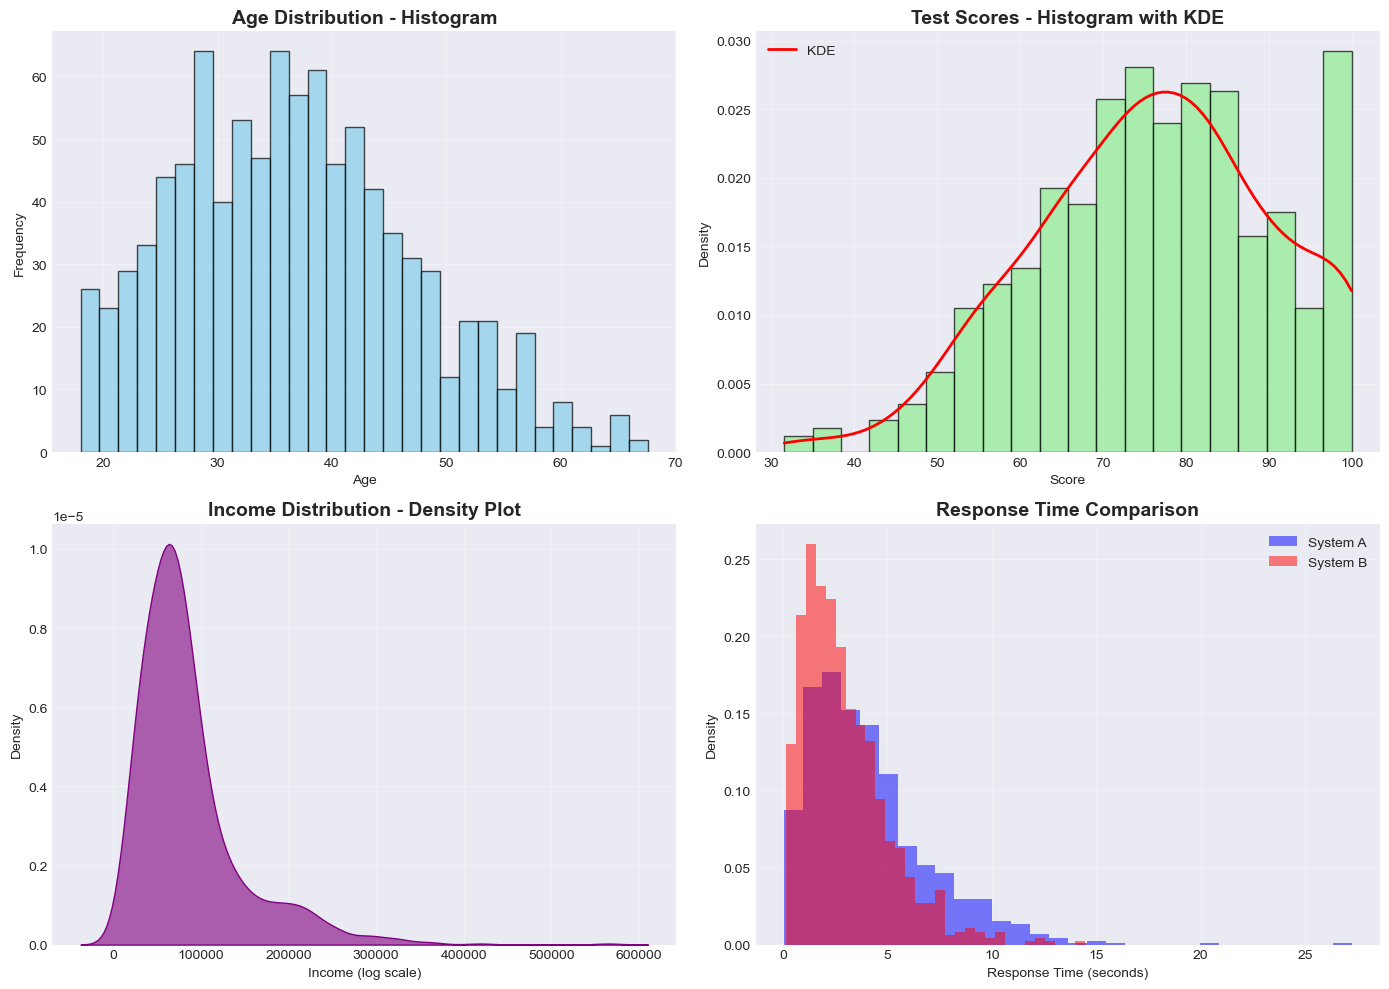

In [2]:
# Generate sample distribution data
age_distribution = np.random.normal(35, 12, 1000)
age_distribution = age_distribution[(age_distribution > 18) & (age_distribution < 70)]
test_scores = np.random.normal(75, 15, 500)
test_scores = np.clip(test_scores, 0, 100)

# Create figure with subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# Basic histogram
ax1.hist(age_distribution, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
ax1.set_title('Age Distribution - Histogram', fontsize=14, fontweight='bold')
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')
ax1.grid(True, alpha=0.3)

# Histogram with KDE overlay
ax2.hist(test_scores, bins=20, density=True, color='lightgreen', edgecolor='black', alpha=0.7)
kde = stats.gaussian_kde(test_scores)
x_range = np.linspace(test_scores.min(), test_scores.max(), 100)
ax2.plot(x_range, kde(x_range), 'r-', linewidth=2, label='KDE')
ax2.set_title('Test Scores - Histogram with KDE', fontsize=14, fontweight='bold')
ax2.set_xlabel('Score')
ax2.set_ylabel('Density')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Pure density plot (KDE)
income_levels = np.concatenate([
    np.random.lognormal(10.5, 0.5, 300),  # Lower income
    np.random.lognormal(11.2, 0.3, 500),  # Middle income
    np.random.lognormal(12.0, 0.4, 200)   # Higher income
])
sns.kdeplot(data=income_levels, ax=ax3, fill=True, color='purple', alpha=0.6)
ax3.set_title('Income Distribution - Density Plot', fontsize=14, fontweight='bold')
ax3.set_xlabel('Income (log scale)')
ax3.set_ylabel('Density')
ax3.grid(True, alpha=0.3)

# Multiple distributions comparison
response_times_a = np.random.gamma(2, 2, 1000)
response_times_b = np.random.gamma(2, 1.5, 1000)
ax4.hist(response_times_a, bins=30, alpha=0.5, label='System A', density=True, color='blue')
ax4.hist(response_times_b, bins=30, alpha=0.5, label='System B', density=True, color='red')
ax4.set_title('Response Time Comparison', fontsize=14, fontweight='bold')
ax4.set_xlabel('Response Time (seconds)')
ax4.set_ylabel('Density')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()